Here we have the D2-net model used for features and key-points generation. I unfortunately did not have time to fine tune it for the satelite imagery. The model does ok for not being finetuned at all

In [ ]:
# @title
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 52.5 MB/s eta 0:00:00


In [ ]:
# @title
import rasterio
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import cv2
import os
from rasterio.plot import show
from rasterio.plot import reshape_as_image
from rasterio.features import rasterize
from skimage.transform import resize
from PIL import Image
import random
from scipy.spatial.distance import cdist

In [ ]:
!pip install torch torchvision tqdm scipy
!git clone https://github.com/mihaidusmanu/d2-net.git
%cd d2-net
!mkdir models
!wget https://dsmn.ml/files/d2-net/d2_tf.pth -O models/d2_tf.pth
!wget https://raw.githubusercontent.com/mihaidusmanu/d2-net/master/lib/model_test.py
!wget https://raw.githubusercontent.com/mihaidusmanu/d2-net/master/lib/utils.py
!wget https://raw.githubusercontent.com/mihaidusmanu/d2-net/master/lib/pyramid.py
!wget https://dusmanu.com/files/d2-net/d2_ots.pth -O models/d2_ots.pth
!wget https://dusmanu.com/files/d2-net/d2_tf.pth -O models/d2_tf.pth
!wget https://dusmanu.com/files/d2-net/d2_tf_no_phototourism.pth -O models/d2_tf_no_phototourism.pth
%cd ..

fatal: destination path 'd2-net' already exists and is not an empty directory.
/content/d2-net
mkdir: cannot create directory ‘models’: File exists
--2024-10-18 14:36:15--  https://dsmn.ml/files/d2-net/d2_tf.pth
Resolving dsmn.ml (dsmn.ml)... failed: Name or service not known.
wget: unable to resolve host address ‘dsmn.ml’
--2024-10-18 14:36:15--  https://raw.githubusercontent.com/mihaidusmanu/d2-net/master/lib/model_test.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6057 (5.9K) [text/plain]
Saving to: ‘model_test.py.1’

model_test.py.1     100%[===================>]   5.92K  --.-KB/s    in 0s      

2024-10-18 14:36:15 (30.4 MB/s) - ‘model_test.py.1’ saved [6057/6057]

--2024-10-18 14:36:15--  https://raw.githubusercontent.com/mihaidusmanu/d2-net/maste

In [ ]:
import sys
sys.path.append('/content/d2-net')

import torch
from torchvision import transforms
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

from lib.model_test import D2Net
from lib.utils import preprocess_image
from lib.pyramid import process_multiscale

# Use CUDA if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

# Load the D2-Net model
model = D2Net(
    model_file='/content/d2-net/models/d2_tf.pth',
    use_relu=True,
    use_cuda=use_cuda
)

# Preprocessing transform
preprocessing = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
with open('/content/summer_images.txt', 'w') as f:
    for img in os.listdir('/content/sample_data/images/summer'):
        f.write(f'/content/sample_data/images/summer/{img}\n')

with open('/content/winter_images.txt', 'w') as f:
    for img in os.listdir('/content/sample_data/images/winter'):
        f.write(f'/content/sample_data/images/winter/{img}\n')



In [ ]:
%cd /content/d2-net
!python extract_features.py --image_list_file /content/summer_images.txt --preprocessing 'caffe'
!python extract_features.py --image_list_file /content/winter_images.txt --preprocessing 'caffe'

/content/d2-net
Namespace(image_list_file='/content/summer_images.txt', preprocessing='caffe', model_file='models/d2_tf.pth', max_edge=1600, max_sum_edges=2800, output_extension='.d2-net', output_type='npz', multiscale=False, use_relu=True)
/content/d2-net/lib/model_test.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for a

In [ ]:
!zip -r /content/sample_data/images/summer.zip /content/sample_data/images/summer

  adding: content/sample_data/images/summer/ (stored 0%)
  adding: content/sample_data/images/summer/tile_1536_256.png.d2-net (deflated 34%)
  adding: content/sample_data/images/summer/tile_1536_4096.png (deflated 0%)
  adding: content/sample_data/images/summer/tile_512_10752.png.d2-net (deflated 34%)
  adding: content/sample_data/images/summer/tile_256_2048.png.d2-net (deflated 34%)
  adding: content/sample_data/images/summer/tile_2304_1536.png.d2-net (deflated 34%)
  adding: content/sample_data/images/summer/tile_6144_8704.png (deflated 0%)
  adding: content/sample_data/images/summer/tile_8448_2816.png (deflated 0%)
  adding: content/sample_data/images/summer/tile_10752_8960.png.d2-net (deflated 34%)
  adding: content/sample_data/images/summer/tile_9216_1024.png.d2-net (deflated 34%)
  adding: content/sample_data/images/summer/tile_3584_4864.png.d2-net (deflated 33%)
  adding: content/sample_data/images/summer/tile_768_8448.png.d2-net (deflated 34%)
  adding: content/sample_data/imag

In [ ]:
!zip -r /content/sample_data/images/winter.zip /content/sample_data/images/winter

  adding: content/sample_data/images/winter/ (stored 0%)
  adding: content/sample_data/images/winter/tile_1536_256.png.d2-net (deflated 33%)
  adding: content/sample_data/images/winter/tile_1536_4096.png (deflated 0%)
  adding: content/sample_data/images/winter/tile_512_10752.png.d2-net (deflated 32%)
  adding: content/sample_data/images/winter/tile_256_2048.png.d2-net (deflated 33%)
  adding: content/sample_data/images/winter/tile_2304_1536.png.d2-net (deflated 34%)
  adding: content/sample_data/images/winter/tile_6144_8704.png (deflated 0%)
  adding: content/sample_data/images/winter/tile_8448_2816.png (deflated 0%)
  adding: content/sample_data/images/winter/tile_10752_8960.png.d2-net (deflated 33%)
  adding: content/sample_data/images/winter/tile_9216_1024.png.d2-net (deflated 33%)
  adding: content/sample_data/images/winter/tile_3584_4864.png.d2-net (deflated 34%)
  adding: content/sample_data/images/winter/tile_768_8448.png.d2-net (deflated 34%)
  adding: content/sample_data/imag

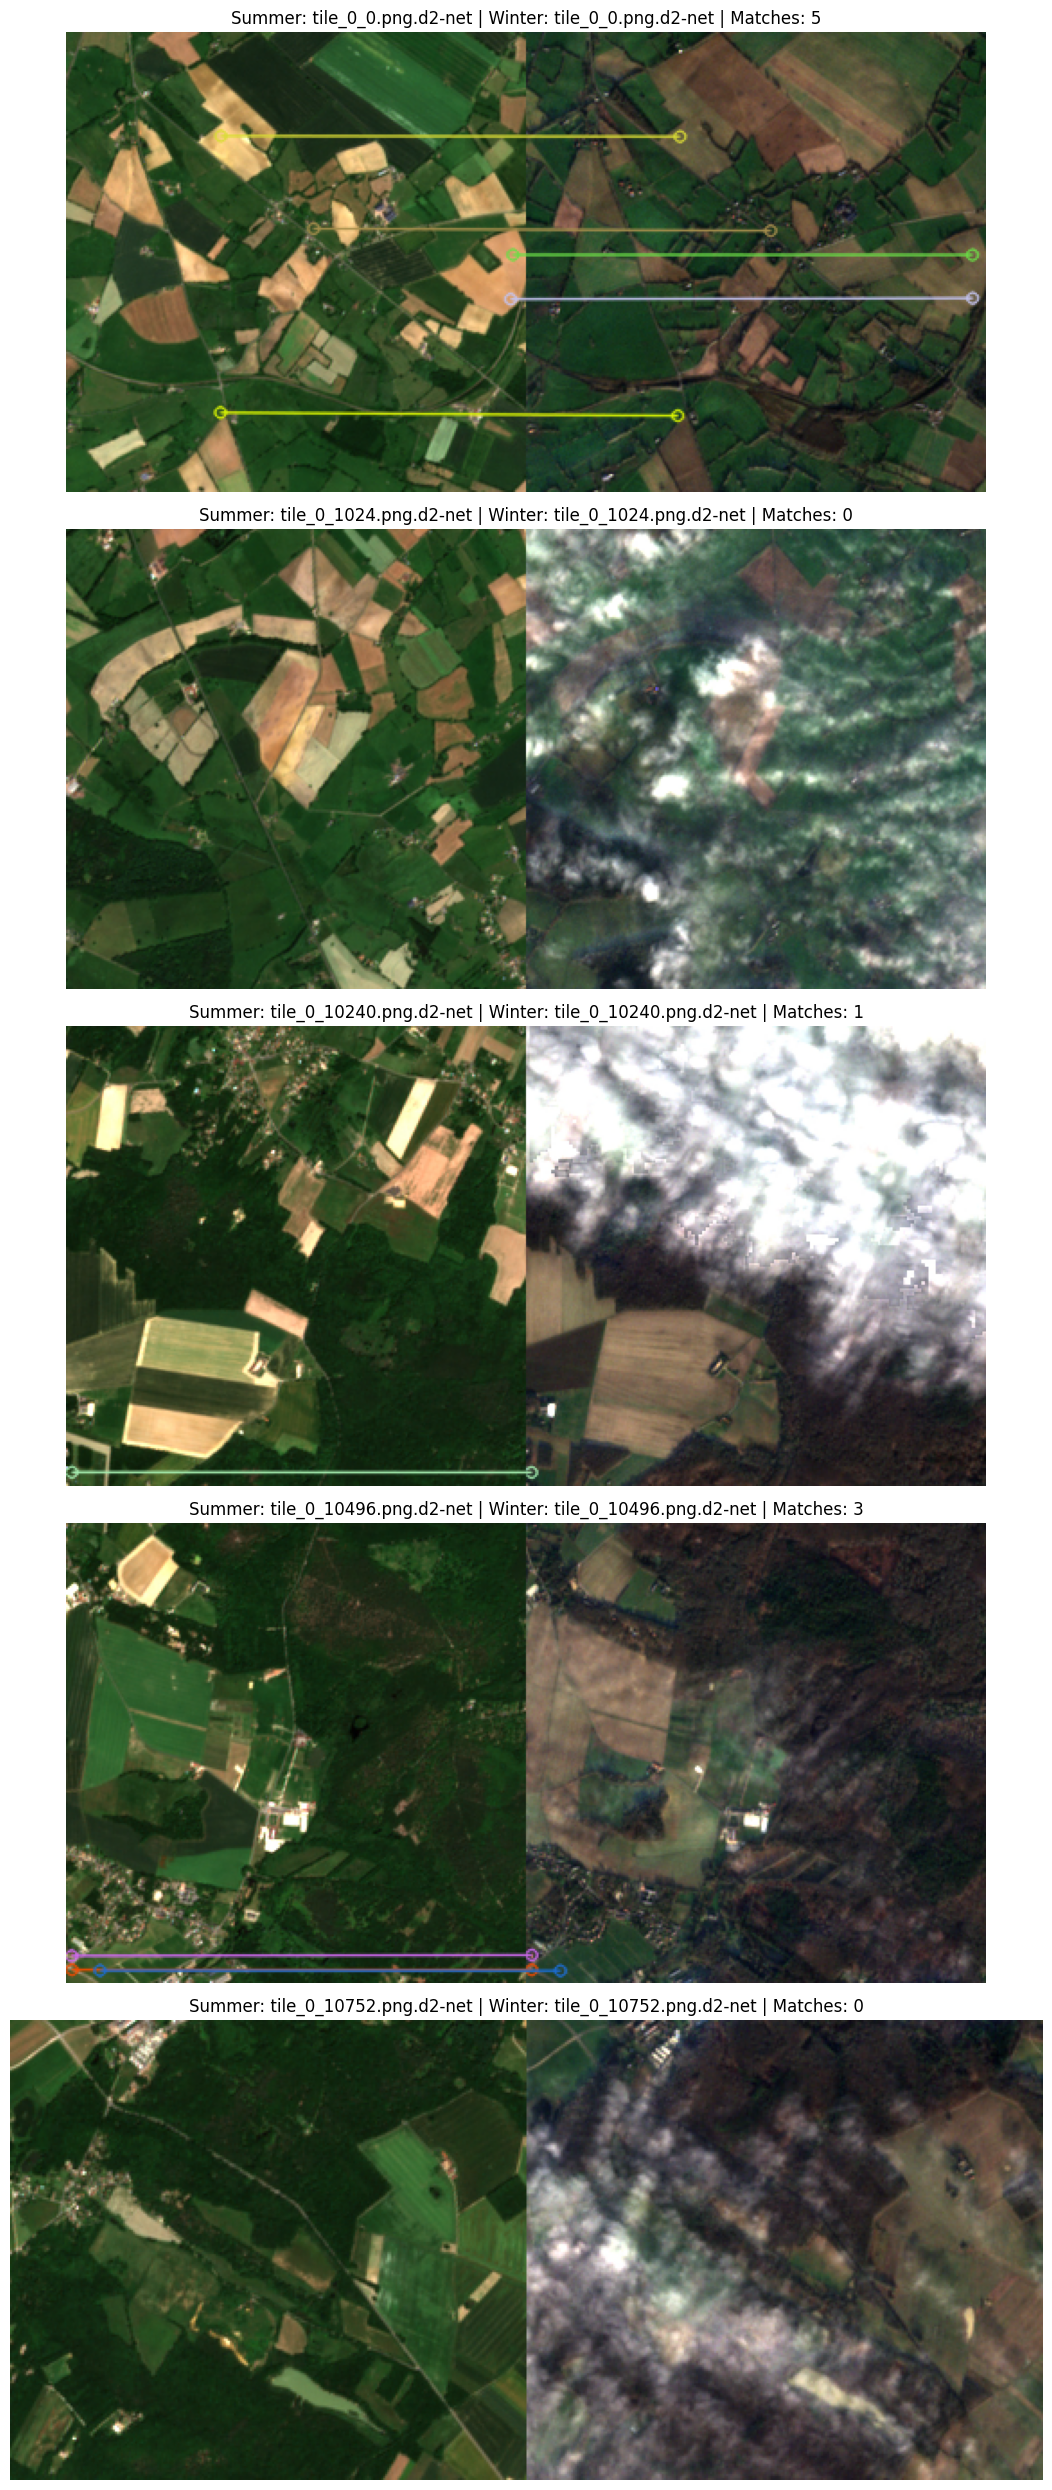

Summer: tile_0_0.png.d2-net | Winter: tile_0_0.png.d2-net | Matches: 5
Summer: tile_0_1024.png.d2-net | Winter: tile_0_1024.png.d2-net | Matches: 0
Summer: tile_0_10240.png.d2-net | Winter: tile_0_10240.png.d2-net | Matches: 1
Summer: tile_0_10496.png.d2-net | Winter: tile_0_10496.png.d2-net | Matches: 3
Summer: tile_0_10752.png.d2-net | Winter: tile_0_10752.png.d2-net | Matches: 0
Summer: tile_0_1280.png.d2-net | Winter: tile_0_1280.png.d2-net | Matches: 0
Summer: tile_0_1536.png.d2-net | Winter: tile_0_1536.png.d2-net | Matches: 2
Summer: tile_0_1792.png.d2-net | Winter: tile_0_1792.png.d2-net | Matches: 0
Summer: tile_0_2048.png.d2-net | Winter: tile_0_2048.png.d2-net | Matches: 0
Summer: tile_0_2304.png.d2-net | Winter: tile_0_2304.png.d2-net | Matches: 0
Summer: tile_0_256.png.d2-net | Winter: tile_0_256.png.d2-net | Matches: 4
Summer: tile_0_2560.png.d2-net | Winter: tile_0_2560.png.d2-net | Matches: 0
Summer: tile_0_2816.png.d2-net | Winter: tile_0_2816.png.d2-net | Matches: 0
S

In [ ]:
import numpy as np
import cv2
import os
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def load_d2net_features(file_path):
    data = np.load(file_path, allow_pickle=True)

    keypoints = data['keypoints']
    scores = data['scores']
    descriptors = data['descriptors']

    return keypoints, scores, descriptors

def match_features(desc1, desc2, ratio=0.8):
    distances = cdist(desc1, desc2, metric='euclidean')
    indices = np.argsort(distances, axis=1)[:, :2]
    ratio_test = distances[np.arange(distances.shape[0]), indices[:, 0]] < ratio * distances[np.arange(distances.shape[0]), indices[:, 1]]
    matches = np.column_stack((np.arange(len(desc1))[ratio_test], indices[ratio_test, 0]))
    return matches

def process_image_pair(summer_path, winter_path):
    # Load features
    summer_kp, summer_scores, summer_desc = load_d2net_features(summer_path)
    winter_kp, winter_scores, winter_desc = load_d2net_features(winter_path)

    # Match features
    matches = match_features(summer_desc, winter_desc)

    # Load images
    summer_img_path = summer_path.replace('.d2-net', '')
    winter_img_path = winter_path.replace('.d2-net', '')

    img1 = cv2.imread(summer_img_path)
    img2 = cv2.imread(winter_img_path)

    if img1 is None or img2 is None:
        raise ValueError(f"Could not read images: {summer_img_path} or {winter_img_path}")

    # Convert keypoints to cv2.KeyPoint objects
    cv_kp1 = [cv2.KeyPoint(x, y, s) for x, y, s in summer_kp]
    cv_kp2 = [cv2.KeyPoint(x, y, s) for x, y, s in winter_kp]

    # Convert matches to cv2.DMatch objects
    cv_matches = [cv2.DMatch(i, j, 0) for i, j in matches]

    # Draw matches
    img_matches = cv2.drawMatches(img1, cv_kp1, img2, cv_kp2, cv_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return img_matches, len(matches)

def process_all_pairs(summer_dir, winter_dir):
    results = []

    summer_files = sorted([f for f in os.listdir(summer_dir) if f.endswith('.d2-net')])
    winter_files = sorted([f for f in os.listdir(winter_dir) if f.endswith('.d2-net')])

    for summer_file, winter_file in zip(summer_files, winter_files):
        summer_path = os.path.join(summer_dir, summer_file)
        winter_path = os.path.join(winter_dir, winter_file)

        try:
            matched_img, num_matches = process_image_pair(summer_path, winter_path)

            results.append({
                'summer_file': summer_file,
                'winter_file': winter_file,
                'matched_img': matched_img,
                'num_matches': num_matches
            })
        except Exception as e:
            print(f"Error processing {summer_file} and {winter_file}: {str(e)}")

    return results

# Usage
summer_dir = "/content/sample_data/images/summer"
winter_dir = "/content/sample_data/images/winter"
results = process_all_pairs(summer_dir, winter_dir)

# Display results
num_to_display = min(5, len(results))

fig, axs = plt.subplots(num_to_display, 1, figsize=(15, 5*num_to_display))
if num_to_display == 1:
    axs = [axs]

for i in range(num_to_display):
    result = results[i]
    axs[i].imshow(cv2.cvtColor(result['matched_img'], cv2.COLOR_BGR2RGB))
    axs[i].set_title(f"Summer: {result['summer_file']} | Winter: {result['winter_file']} | Matches: {result['num_matches']}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# Print number of matches for all pairs
for result in results:
    print(f"Summer: {result['summer_file']} | Winter: {result['winter_file']} | Matches: {result['num_matches']}")

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


Показано результат, скорочений до останніх рядків (5000).
Summer: tile_7424_3840.png.d2-net | Winter: tile_7424_3840.png.d2-net
  Number of Matches: 0
  Matching Ratio: 0.0000
  Precision at K: 0.0000
  Mean Matching Accuracy: nan
  Summer Keypoint Distribution: [74.2081  70.59449]
  Winter Keypoint Distribution: [69.38652  72.440445]
  Repeatability Score: 0.7139
  Matching Score: 0.0000

Summer: tile_7424_4096.png.d2-net | Winter: tile_7424_4096.png.d2-net
  Number of Matches: 0
  Matching Ratio: 0.0000
  Precision at K: 0.0000
  Mean Matching Accuracy: nan
  Summer Keypoint Distribution: [71.30551 64.7293 ]
  Winter Keypoint Distribution: [72.44958 69.55824]
  Repeatability Score: 0.7307
  Matching Score: 0.0000

Summer: tile_7424_4352.png.d2-net | Winter: tile_7424_4352.png.d2-net
  Number of Matches: 0
  Matching Ratio: 0.0000
  Precision at K: 0.0000
  Mean Matching Accuracy: nan
  Summer Keypoint Distribution: [74.150154 73.84304 ]
  Winter Keypoint Distribution: [71.337814 73.7

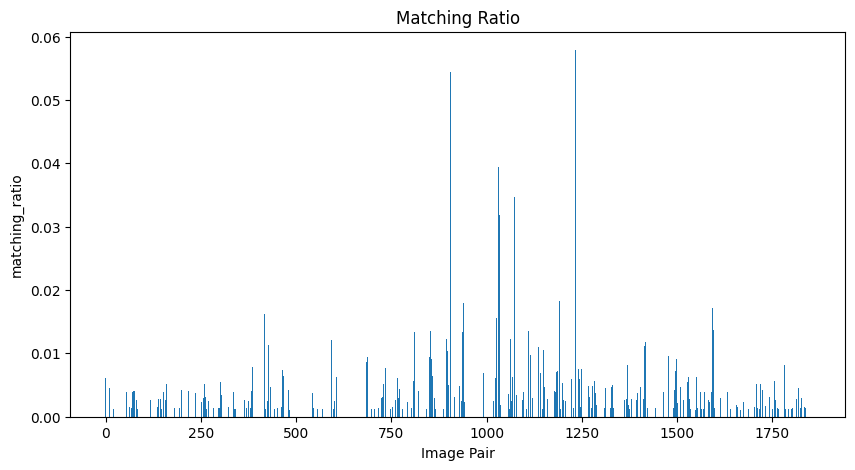

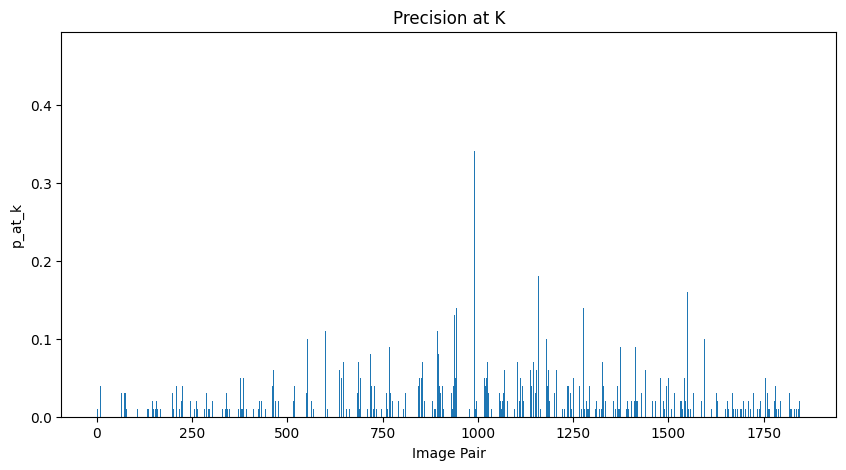

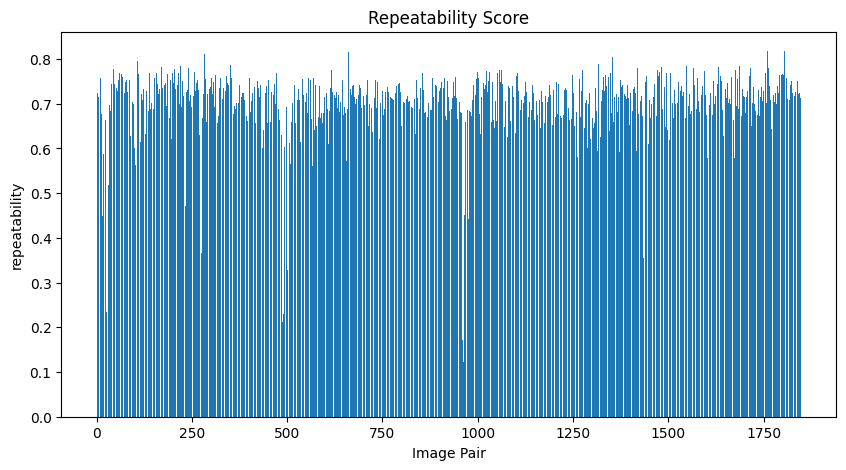

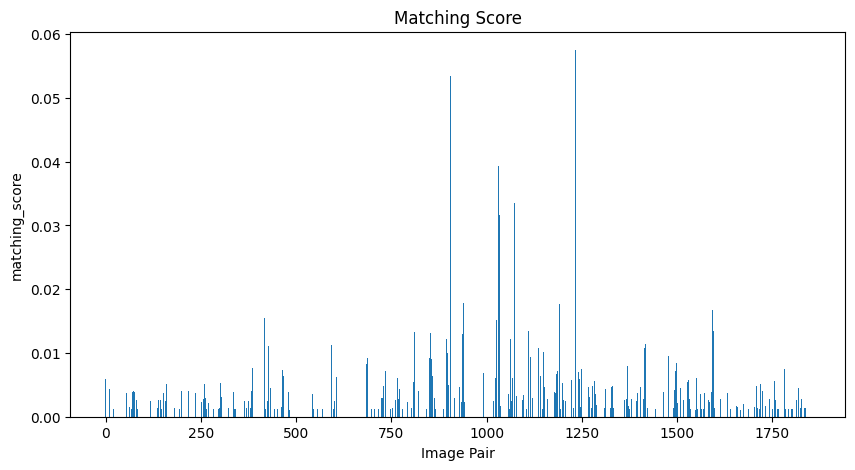

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def evaluate_performance(summer_dir, winter_dir):
    summer_files = sorted([f for f in os.listdir(summer_dir) if f.endswith('.d2-net')])
    winter_files = sorted([f for f in os.listdir(winter_dir) if f.endswith('.d2-net')])

    results = []

    for summer_file, winter_file in zip(summer_files, winter_files):
        summer_path = os.path.join(summer_dir, summer_file)
        winter_path = os.path.join(winter_dir, winter_file)

        try:
            # Load features
            summer_kp, summer_scores, summer_desc = load_d2net_features(summer_path)
            winter_kp, winter_scores, winter_desc = load_d2net_features(winter_path)

            # Match features
            matches = match_features(summer_desc, winter_desc)

            # 1. Number of Matches and Matching Ratio
            num_matches = len(matches)
            matching_ratio = num_matches / min(len(summer_kp), len(winter_kp))

            # 2. Precision at K (P@K)
            k = 100  # You can adjust this value
            p_at_k = len(matches[:k]) / k if len(matches) >= k else len(matches) / k

            # 3. Mean Matching Accuracy
            matched_summer_kp = summer_kp[matches[:, 0]]
            matched_winter_kp = winter_kp[matches[:, 1]]
            distances = np.sqrt(np.sum((matched_summer_kp[:, :2] - matched_winter_kp[:, :2])**2, axis=1))
            mean_accuracy = np.mean(distances)

            # 4. Distribution of Keypoints
            summer_kp_dist = np.std(summer_kp[:, :2], axis=0)
            winter_kp_dist = np.std(winter_kp[:, :2], axis=0)

            # 5. Repeatability Score
            def compute_repeatability(kp1, kp2, threshold=5):
                distances = cdist(kp1[:, :2], kp2[:, :2])
                min_distances = np.min(distances, axis=1)
                return np.sum(min_distances < threshold) / len(kp1)

            repeatability = compute_repeatability(summer_kp, winter_kp)

            # 6. Matching Score
            matching_score = 2 * num_matches / (len(summer_kp) + len(winter_kp))

            results.append({
                'summer_file': summer_file,
                'winter_file': winter_file,
                'num_matches': num_matches,
                'matching_ratio': matching_ratio,
                'p_at_k': p_at_k,
                'mean_accuracy': mean_accuracy,
                'summer_kp_dist': summer_kp_dist,
                'winter_kp_dist': winter_kp_dist,
                'repeatability': repeatability,
                'matching_score': matching_score
            })

        except Exception as e:
            print(f"Error processing {summer_file} and {winter_file}: {str(e)}")

    return results

# Usage
summer_dir = "/content/sample_data/images/summer"
winter_dir = "/content/sample_data/images/winter"
evaluation_results = evaluate_performance(summer_dir, winter_dir)

# Print results
for result in evaluation_results:
    print(f"Summer: {result['summer_file']} | Winter: {result['winter_file']}")
    print(f"  Number of Matches: {result['num_matches']}")
    print(f"  Matching Ratio: {result['matching_ratio']:.4f}")
    print(f"  Precision at K: {result['p_at_k']:.4f}")
    print(f"  Mean Matching Accuracy: {result['mean_accuracy']:.4f}")
    print(f"  Summer Keypoint Distribution: {result['summer_kp_dist']}")
    print(f"  Winter Keypoint Distribution: {result['winter_kp_dist']}")
    print(f"  Repeatability Score: {result['repeatability']:.4f}")
    print(f"  Matching Score: {result['matching_score']:.4f}")
    print()

# Visualize results
def plot_metric(results, metric, title):
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(results)), [r[metric] for r in results])
    plt.title(title)
    plt.xlabel('Image Pair')
    plt.ylabel(metric)
    plt.show()

plot_metric(evaluation_results, 'matching_ratio', 'Matching Ratio')
plot_metric(evaluation_results, 'p_at_k', 'Precision at K')
plot_metric(evaluation_results, 'repeatability', 'Repeatability Score')
plot_metric(evaluation_results, 'matching_score', 'Matching Score')

In [ ]:
def load_d2net_features(file_path):
    data = np.load(file_path, allow_pickle=True)
    keypoints = data['keypoints']
    descriptors = data['descriptors']
    return keypoints, descriptors

file_path = '/content/sample_data/images/winter/tile_0_0.png.d2-net'
keypoints, descriptors = load_d2net_features(file_path)

print(f"Number of keypoints: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")

Number of keypoints: 873
Descriptor shape: (873, 512)


In [ ]:
def match_features(desc1, desc2, threshold=0.8):
    # Compute distance matrix
    distances = cdist(desc1, desc2, metric='euclidean')

    # For each descriptor in desc1, find the closest two in desc2
    indices = np.argsort(distances, axis=1)[:, :2]
    distances = np.take_along_axis(distances, indices, axis=1)

    # Apply Lowe's ratio test
    mask = distances[:, 0] < threshold * distances[:, 1]

    matches = np.column_stack((np.arange(len(desc1))[mask], indices[mask, 0]))
    return matches

def process_image_pair(summer_path, winter_path):
    # Extract features
    kp1, desc1 = load_d2net_features(summer_path)
    kp2, desc2 = load_d2net_features(winter_path)

    # Match features
    matches = match_features(desc1, desc2)

    # Visualize matches
    img1 = cv2.imread(summer_path)
    img2 = cv2.imread(winter_path)

    matched_img = cv2.drawMatches(img1, [cv2.KeyPoint(x, y, 1) for x, y in kp1],
                                  img2, [cv2.KeyPoint(x, y, 1) for x, y in kp2],
                                  [cv2.DMatch(i, j, 0) for i, j in matches], None,
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return matched_img, len(matches)